In [8]:
!source ../../env/bin/activate

In [1]:
import re
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = "../../data/cleaned_data.xlsx"

mission_df = pd.read_excel(data, sheet_name="missions")
mission_df['year'] = mission_df['Date'].apply(lambda x: re.search(r"\d{4}", x).group(0))
mission_df = mission_df.drop('Date', axis="columns")
mission_df.head()

,Company Name,Location,Status Rocket,Cost,Status Mission,Country,Vehicle,Mission,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Active,50.00,Success,USA,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Active,29.75,Success,China,Long March 2D,Gaofen-9 04 & Q-SAT,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Active,NaN,Success,USA,Starship Prototype,150 Meter Hop,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Active,65.00,Success,Kazakhstan,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Active,145.00,Success,USA,Atlas V 541,Perseverance,2020


In [4]:
mission_df.groupby(['Country', 'Company Name']).size().reset_index()

,Country,Company Name,0
0,Australia,AMBA,1
1,Australia,CECLES,3
2,Australia,RAE,2
3,Barents Sea,SRC,3
4,Brazil,AEB,3
...,...,...,...
62,USA,ULA,140
63,USA,US Air Force,161
64,USA,US Navy,17
65,USA,Virgin Orbit,1


In [5]:
print("Total Nummber of different companies overall:", mission_df['Company Name'].nunique())
print("Total Nummber of different rockets used overall:", mission_df['Vehicle'].nunique())

Total Nummber of different companies overall: 56
Total Nummber of different rockets used overall: 352


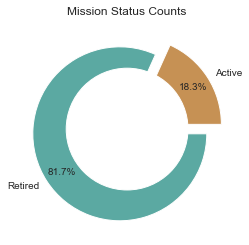

In [6]:
groupby_status = mission_df.groupby(['Status Rocket']).size().reset_index(name="count")
explode = (0.1, 0.1)
plt.pie(groupby_status['count'], labels=groupby_status['Status Rocket'],
        autopct='%1.1f%%', pctdistance=0.8,
        explode=explode, colors=['#C69154', '#5BA9A2'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Mission Status Counts')
plt.savefig("../../charts/mission_status_counts.png")
plt.show()

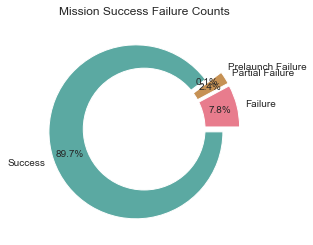

In [7]:
groupby_role = mission_df.groupby(['Status Mission']).size().reset_index(name="count")
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(groupby_role['count'], labels=groupby_role['Status Mission'],
        autopct='%1.1f%%', pctdistance=0.8,
        explode=explode, colors=['#E87C8D', '#C69154', '#99A255', '#5BA9A2'])
centre_circle = plt.Circle((0, 0, 0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Mission Success Failure Counts')
plt.savefig("../../charts/mission_success_failure_counts.png")
plt.show()

In [8]:
mission_df.groupby('Country').size()

Country
Australia                            6
Barents Sea                          3
Brazil                               3
China                              268
France                             303
Gran Canaria                         2
India                               76
Iran                                13
Israel                              11
Japan                              126
Kazakhstan                         701
Kenya                                9
New Mexico                           4
New Zealand                         13
North Korea                          5
Pacific Missile Range Facility       1
Pacific Ocean                       36
Russia                            1395
Shahrud Missile Test Site            1
South Korea                          3
USA                               1344
Yellow Sea                           1
dtype: int64

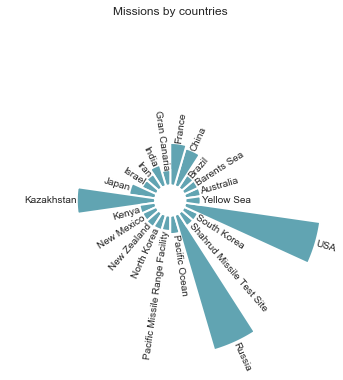

In [9]:
groupby_country = mission_df.groupby(['Country']).size().reset_index(name="count")
upperLimit = 175
lowerLimit = 150
max = groupby_country['count'].max()
slope = (max - lowerLimit) / max
heights = slope * groupby_country['count'] + lowerLimit
width = 2*np.pi / len(groupby_country.index)
indexes = list(range(1, len(groupby_country.index)+1))
angles = [element * width for element in indexes]
plt.figure(figsize=(15,6))
ax = plt.subplot(111, polar=True)
plt.axis('off')
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)
labelPadding = 4
for bar, angle, height, label in zip(bars,angles, heights, groupby_country['Country']):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
plt.title('Missions by countries')
plt.savefig("../../charts/missions_by_countries.png", bbox_inches='tight')
plt.show()

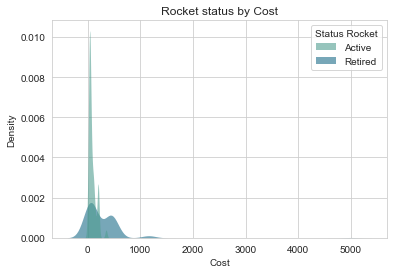

In [10]:
sns.kdeplot(data=mission_df.loc[mission_df['Cost'].notnull()], 
            x="Cost", hue="Status Rocket", 
            fill=True, common_norm=False, palette="crest",
            alpha=.6, linewidth=0
).set(
    title="Rocket status by Cost"
)
plt.savefig("../../charts/missions_rocket_status_by_cost.png", bbox_inches='tight')
plt.show()

In [4]:
non_zero_cost = mission_df.loc[mission_df['Cost'].notnull()]
pd.pivot_table(data=non_zero_cost, index=['Country', 'Company Name'], values=['Cost'], aggfunc=[np.sum, np.count_nonzero, np.mean]).reset_index()

,Country,Company Name,sum,count_nonzero,mean
,,,Cost,Cost,Cost
0,China,CASC,6334.96,157.0,40.350064
1,China,ExPace,28.30,1.0,28.300000
2,France,Arianespace,16248.00,94.0,172.851064
3,France,ESA,37.00,1.0,37.000000
4,Gran Canaria,Northrop,80.00,2.0,40.000000
5,India,ISRO,2177.00,67.0,32.492537
6,Japan,JAXA,168.00,3.0,56.000000
7,Japan,MHI,3532.50,37.0,95.472973
8,Kazakhstan,Arianespace,97.00,2.0,48.500000


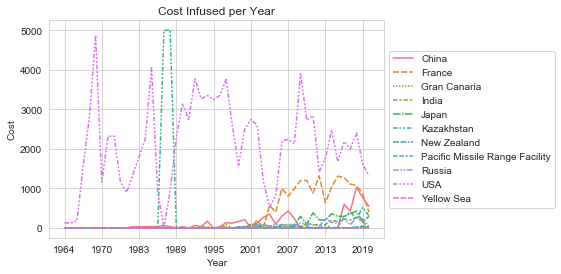

In [5]:
x = pd.pivot_table(data=non_zero_cost, columns=['Country'], values='Cost', index=['year'], aggfunc=np.sum, fill_value=0)
g = sns.lineplot(data=x)
plt.title("Cost Infused per Year")
plt.xlabel("Year")
plt.ylabel("Cost")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.savefig("../../charts/missions_cost_per_country_per_year.png", bbox_inches='tight')
plt.show()

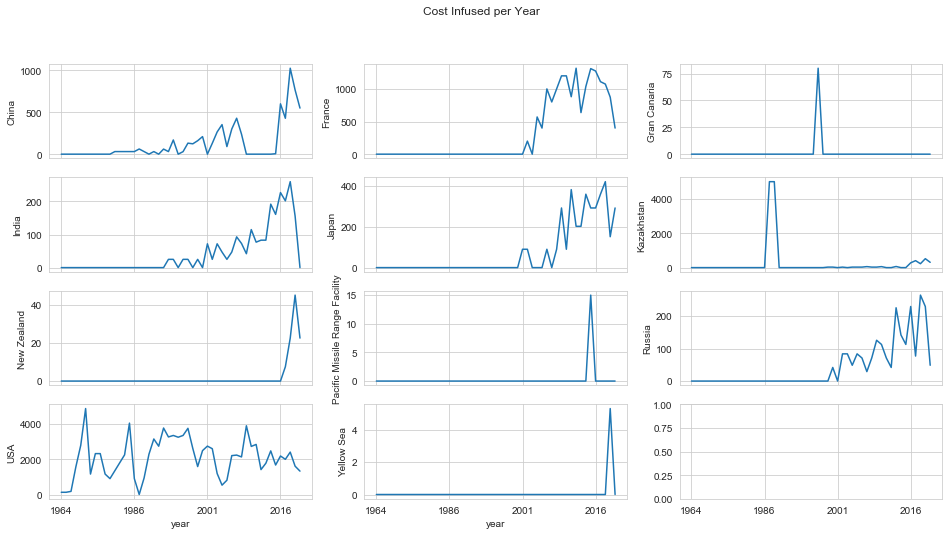

In [7]:
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(16,8))
fig.suptitle('Cost Infused per Year')

for i, country in enumerate(x.columns.values):
    sns.lineplot(ax=axes[i // 3, i % 3], data=x[country])
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

fig.savefig("../../charts/mission_cost_infused_per_year_grid.png")

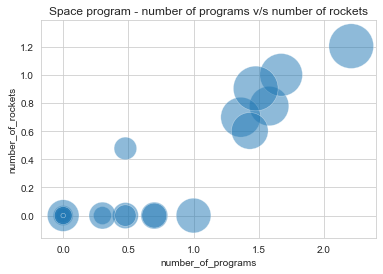

In [13]:
df_company_vs_vehicle = mission_df.groupby(['Country', 'Company Name', 'Vehicle']).size()
df_company_vs_vehicle = pd.concat([
    df_company_vs_vehicle.groupby(level=[0, 1]).nunique().groupby(level=0).count().rename("number_of_rockets"), 
    df_company_vs_vehicle.groupby(level=[0,2]).sum().groupby(level=0).count().rename("number_of_programs"),
    df_company_vs_vehicle.groupby(level=[0,1]).sum().groupby(level=0).sum().rename("number_of_missions")
], axis=1)
sns.scatterplot(data=np.log10(df_company_vs_vehicle), x="number_of_programs", y="number_of_rockets", size="number_of_missions", 
                legend=False, alpha=0.5, sizes=(20, 2000)).set(title="Space program - number of programs v/s number of rockets")
plt.savefig("../../charts/mission_space_program_details.png")
plt.show()

In [11]:
import networkx as nx

In [19]:
df_company_vs_vehicle = mission_df.groupby(['Country', 'Company Name', 'Vehicle']).size()
df_company_vs_vehicle = pd.concat([
    df_company_vs_vehicle.groupby(level=[0, 1]).nunique().groupby(level=0).count().rename("number_of_rockets"), 
    df_company_vs_vehicle.groupby(level=[0,2]).sum().groupby(level=0).count().rename("number_of_programs"),
    df_company_vs_vehicle.groupby(level=[0,1]).sum().groupby(level=0).sum().rename("number_of_missions")
], axis=1)
df_company_vs_vehicle

,number_of_rockets,number_of_programs,number_of_missions
Country,,,
Australia,3,3,6
Barents Sea,1,2,3
Brazil,1,1,3
China,6,38,268
France,5,23,303
Gran Canaria,1,1,2
India,1,10,76
Iran,1,5,13
Israel,1,3,11


In [46]:
df_company_vs_vehicle = mission_df.groupby(['Country', 'Company Name']).size().rename("number of missions")
df_company_vs_vehicle = df_company_vs_vehicle.reset_index()
df_company_vs_vehicle['Type'] = "Directed"
G = nx.from_pandas_edgelist(df_company_vs_vehicle,
                            source='Country', 
                            target='Company Name', 
                            edge_attr='number of missions')

In [50]:
from pyvis.network import Network
net = Network(notebook=True, height="650px", width="100%", directed=False)
net.from_nx(G)
net.show('mission_organizations_network_visual.html')